In [16]:
from keras.datasets import imdb 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [2]:
max([max(sequence) for sequence in train_data])

9999

In [3]:
import collections

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (value, key) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 3s 2us/step


In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [10]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 319us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8721
Epoch 2/20
15000/15000 [==============================] - 3s 212us/step - loss: 0.2957 - acc: 0.9045 - val_loss: 0.2990 - val_acc: 0.8911
Epoch 3/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.2160 - acc: 0.9287 - val_loss: 0.3089 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 3s 217us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 3s 212us/step - loss: 0.1415 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3086 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.0970 - acc: 0.9710 - val_loss: 0.3147 - 

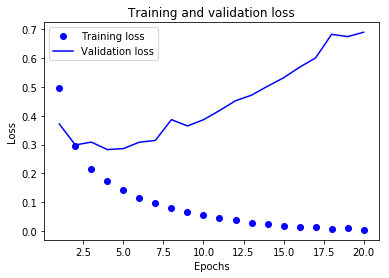

Figure 3.7 Training and validation loss


In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = list(range(1, len(acc) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Figure 3.7 Training and validation loss")

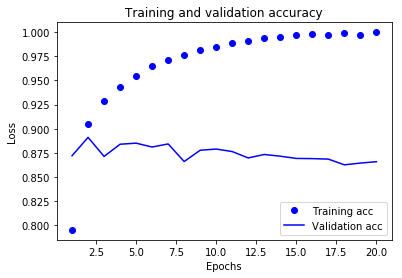

Figure 3.8 Training and validation accuracy


In [14]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Figure 3.8 Training and validation accuracy")

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.4741 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 4s 144us/step - loss: 0.2675 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 4s 142us/step - loss: 0.2033 - acc: 0.9285
Epoch 4/4
25000/25000 [==============================] - 4s 166us/step
